# Finding yield curves for government security bonds

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Reading Interest Rate Sheet
ir = pd.read_excel("4.Interest Rates.xlsx")
ir.head()

,Maturity (Yrs),Rates
0,0.0,5.009979
1,0.5,5.130204
2,1.0,5.272825
3,1.5,5.426716
4,2.0,5.584212


In [4]:
#Reading list of bonds sheet
bond_list = pd.read_excel("4. Bond List.xlsx")
bond_list.head()

,SECTYPE,SECURITY,ISSUE_NAME,ISSUE_DESC,ISSUE_DATE,MAT_DATE,Last IP Dt,Next IP Dt,Cpn Freq,Last Traded Date,Last Traded Price (in Rs.),ISIN NO.
0,TB,182D,190320.0000,GOI T BILL 182D-19/03/2020,2019-09-19,2020-03-19,NaT,NaT,NaN,2020-01-22,99.2266,IN002019Y266
1,GS,CG2024,0.0915,GOI LOAN 9.15% 2024,2011-11-14,2024-11-14,2019-11-14,2020-05-14,Half Yearly,2020-01-30,110.4802,IN0020110048
2,GS,CG2025,0.0772,GOI LOAN 7.72% 2025,2015-05-25,2025-05-25,2019-11-25,2020-05-25,Half Yearly,2020-01-28,104.9500,IN0020150036
3,GS,CG2027,0.0824,GOI LOAN 8.24%2027(NATBK.RECAP,2007-02-15,2027-02-15,2019-08-15,2020-02-15,Half Yearly,2020-01-24,107.7200,IN0020060078


In [5]:
today_date = datetime.datetime(2019,12,9)
today_date

datetime.datetime(2019, 12, 9, 0, 0)

In [6]:
dirty_price = []
accrued_int = []
quoted_price = []
time_to_maturity = []
ytm = []

In [7]:
    #Treasury Bills
    
    #Input values
    FV = 100
    N = (bond_list.iloc[0,5] - today_date).days/365
    time_to_maturity.append((bond_list.iloc[0,5] - today_date).days/(365))
    w = 2*N -int(2*N)
    
    #Current value of bond
    rr = (ir.iloc[int(N*2),1] + (w)*(ir.iloc[int(N*2)+1,1]-ir.iloc[int(N*2),1]))/100
    val = FV/((1+rr)**(N))
    dirty_price.append(val)
    accrued = (1-w)*FV
    accrued_int.append(accrued)
    quoted = val - accrued
    quoted_price.append(quoted)
    
    #Finding YTM
    
    y = rr
    ytm.append(y)

In [8]:
# Iterative reading of government security that pay coupons

for i in range(1,len(bond_list)):
    
    #Input values
    FV = 100
    Cpn_Rate = bond_list.iloc[i,2]
    f=2
    N = int((bond_list.iloc[i,5] - today_date).days/(365/f))+1
    NoDaysTillNextCpn = (bond_list.iloc[i,7] - today_date).days
    w=(NoDaysTillNextCpn/(365/f))
    tol = 0.0001
    time_to_maturity.append((bond_list.iloc[i,5] - today_date).days/(365))
    
    #Current value of bond
    j=1
    val = 0
    while(j<=N):
        rr = (ir.iloc[j-1,1] + w*(ir.iloc[j,1]-ir.iloc[j-1,1]))/100
        val = val + (Cpn_Rate*FV)/f/((1+rr/f)**(j-1+w))
        j=j+1
    val = val + FV/((1+rr/f)**(N-1+w))
    dirty_price.append(val)
    accrued = (1-w)*Cpn_Rate*FV/f
    accrued_int.append(accrued)
    quoted = val - accrued
    quoted_price.append(quoted)
    
    #Finding YTM
    
    y = ir.iloc[:N,1].mean()  #Initialising y
    y = y/100
    
    while(True):
        v1 = 0
        v2 = 0
        k=1
        while(k<=N):
            v = (Cpn_Rate*FV)/f/((1+y/f)**(k-1+w))
            v1 = v1 + v
            v2 = v2 + v*((k-1+w)/f)/(1+y/f)
            k=k+1
        v1 = v1 + FV/((1+y/f)**(N-1+w))
        v2 = v2 + FV*((N-1+w)/f)/((1+y/f)**(N+w))

        if(abs(val - v1) < tol):   #Setting tolerance level
            break
        else:
            y = y - (val-v1)/v2
    
    ytm.append(y)


In [9]:
time_to_maturity

[0.27671232876712326, 4.936986301369863, 5.463013698630137, 7.191780821917808]

In [10]:
ytm

[0.05076514068980115,
 0.06292903176237162,
 0.06400547405647529,
 0.06634319211847722]

In [11]:
dirty_price

[98.63910423877688, 112.58149811124203, 106.3027467986863, 111.63028003468983]

In [12]:
accrued_int

[44.657534246575345,
 0.6392465753424657,
 0.30668493150684933,
 2.584876712328767]

In [13]:
quoted_price

[53.981569992201536,
 111.94225153589956,
 105.99606186717945,
 109.04540332236107]

Text(0.5,1,'YIELD CURVE')

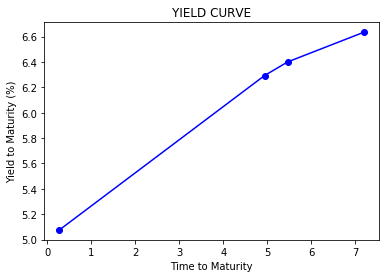

In [21]:
#Plotting the yield curve
plt.plot(time_to_maturity, [i*100 for i in ytm], color='blue',marker='o')
plt.xlabel("Time to Maturity")
plt.ylabel("Yield to Maturity (%)")
plt.title("YIELD CURVE")

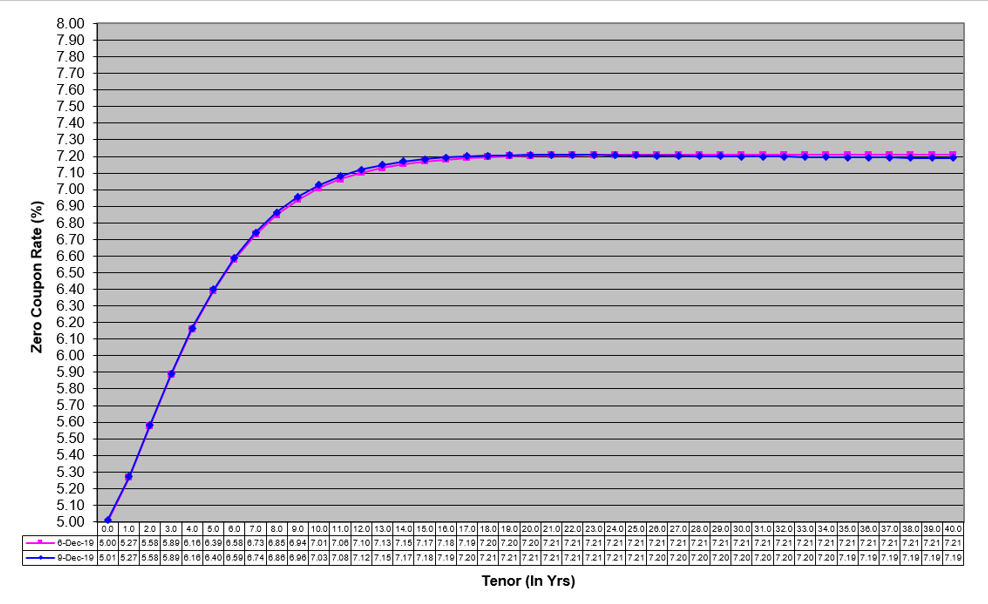

In [18]:
#This is the ZCYC yield curve as downloaded from the NSE website
from IPython.display import Image
Image(filename='ZCYC Yield Curve.png')

###### Critical comments

As can be seen, the graph so obtained by me for the yield curve closely resembles the ZCYC curve. 
Clearly, the lack of data points results in a not-so-smooth yield curve, however the essence remains the same. As time to maturity increases, yield to maturity also increases though in a decreasing fashion.